In [8]:
!unzip datos.zip

import pandas as pd
#1.1
accidentes=pd.read_csv("accidentes.csv")
vehiculos=pd.read_csv("vehiculos.csv")

print("Accidentes:")
print(accidentes.info())
print(accidentes.describe(include='all'))

print("\nVehiculos:")
print(vehiculos.info())
print(vehiculos.describe(include='all'))


1.2



Archive:  datos.zip
replace vehiculos.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Accidentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   1st_Road_Class                               136621 non-null  object 
 2   1st_Road_Number                              136621 non-null  float64
 3   2nd_Road_Class                               79632 non-null   object 
 4   2nd_Road_Number                              136004 non-null  float64
 5   Accident_Severity                            136621 non-null  object 
 6   Carriageway_Hazards                          2703 non-null    object 
 7   Date                                         136621 non-null  object 
 8   Day_of_Week                              

In [33]:
#1.2
#primero debemos detectar todos los espacios en blanco

print("valores faltantes en accidentes:")
print(accidentes.isnull().sum())

print("valores faltantes en vehiculos:")
print(vehiculos.isnull().sum())

#ahora revisamos cada columna, en donde si es una columna en modo string y tiene un espacio vacio
#rellenarla con none, y si es numerica y tiene espacio vacio rellenarla con un 0
#por lo que revisamos cada columna y dependiente de si esta en string o numerico y si esta vacio lo rellenamos
for columna in accidentes.columns:
    if accidentes[columna].dtype == 'object':
        # Si es la columna "Time", reemplazamos con NaT
        if columna == 'Time':
            accidentes[columna] = accidentes[columna].replace('none', pd.NaT)  # Corrección
            accidentes[columna] = pd.to_datetime(accidentes[columna], errors='coerce')  # Convertir a datetime
        else:
            accidentes[columna] = accidentes[columna].fillna('none')  # Resto de columnas tipo object
    elif pd.api.types.is_numeric_dtype(accidentes[columna]):
        accidentes[columna] = accidentes[columna].fillna(0)

#repetimos para vehiculos
for columna in vehiculos.columns:
    if vehiculos[columna].dtype == 'object':
        vehiculos[columna] = vehiculos[columna].fillna('none')
    elif pd.api.types.is_numeric_dtype(vehiculos[columna]):
        vehiculos[columna] = vehiculos[columna].fillna(0)

#Para este caso, use IA para que me ayude a diferenciar entre columnas con string y numericas para poder diferenciar
#a cual le pomnmgo none y a cual cero



Valores faltantes en accidentes:
Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location           

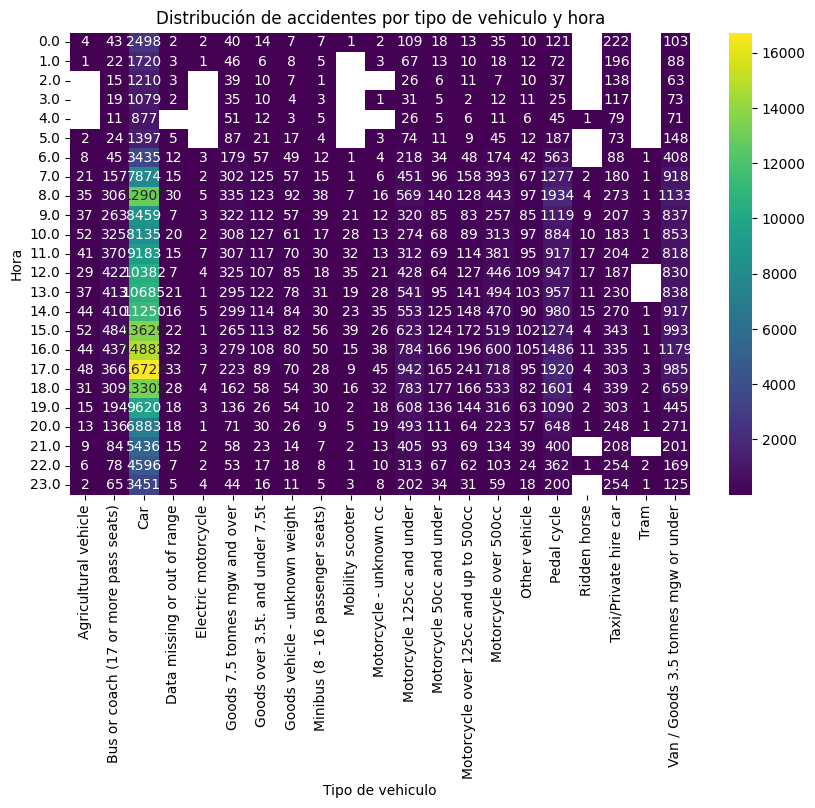

In [19]:
#1.3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#para este caso use la ayuda de la IA para ayudarme con que usar para hacer los datos visibles, con lo que me recomendo
#importar matplotlib y crear un heatmap
#Primero combinamos informacion de accidentes y vehiculos
#luego convertimos la columna de time a objetos de fecha
#y extraemos la hora de la columna
mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")

# Reemplazamos "none" con NaT (Not a Time) en la columna "Time"
mergi['Time'] = mergi['Time'].replace('none', pd.NaT)

# Convertimos la columna "Time" a datetime, ignorando los errores
mergi["Time"]=pd.to_datetime(mergi["Time"], errors='coerce')

# Extraemos la hora de la columna "Time"
mergi["Hour"]=pd.to_datetime(mergi["Time"]).dt.hour

#ahora creamos una tabla dinamica para agregar los conteos de accidentes en base a su hora y vehiculo
# Corrección: usar 'columns' en lugar de 'columna'
tabla=mergi.pivot_table(index="Hour", columns="Vehicle_Type", values="Accident_Index", aggfunc='count')

#ahora con seaborn creamos visiblemente la distribucion
plt.figure(figsize=(10,6))
sns.heatmap(tabla,annot=True,cmap="viridis",fmt=".0f") # Corrección: usar fmt=".0f" o ".2f"
plt.title("Distribución de accidentes por tipo de vehiculo y hora")
plt.xlabel("Tipo de vehiculo")
plt.ylabel("Hora")
plt.show()

#a base del diseño, se puede ver que en las hotras pico de la mañana o de la tarde hay mayor cantidad de accidentes
#ademas, con las bicicletas se observa que hay mas accidentes en el dia y fines de semana. y los de carga en la noche

In [36]:
#1.4

import pandas as pd

mergi=pd.merge(accidentes,vehiculos,on="Accident_Index")

def calculo_severidad(grupo):
  # Corrección: Convertir "Accident_Severity" a numérico antes de sumar
  severidad = pd.to_numeric(grupo["Accident_Severity"], errors='coerce').sum()
  vehiculos = grupo.shape[0]
  grupo["Age_of_Vehicle"] = pd.to_numeric(grupo["Age_of_Vehicle"], errors='coerce')
  edad_vehiculo=grupo["Age_of_Vehicle"].sum()
  indice=(severidad/vehiculos)*(1+edad_vehiculo/10)
  return severidad/vehiculos

severidad_aut=mergi.groupby("Local_Authority_(District)").apply(calculo_severidad)
top10=severidad_aut.sort_values(ascending=False).head(10)
print(top10)

#para este caso me tiraba un error sobre la age of vehicle y trate de arreglaro preguntandole a la IA
#pero por lo que veo estoy mal desde antes y el tiempo no me dio para arreglar mi error entonces va a quedar esto malo igual
#solo porque cometi un error filtrando la columna de edad de vehiculos en la parte 1.2


Local_Authority_(District)
York               0.0
Aberdeen City      0.0
Aberdeenshire      0.0
Adur               0.0
Allerdale          0.0
Amber Valley       0.0
Angus              0.0
Argyll and Bute    0.0
Arun               0.0
Ashfield           0.0
dtype: float64


<ipython-input-36-8654be152984>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severidad_aut=mergi.groupby("Local_Authority_(District)").apply(calculo_severidad)
